# The correlation between the rise in CO2 and the rise in global temperature
# Using Python for data analytic and visualization

First, I import a few major Python libraries for data science, namely **pandas**, **numpy**, and **matplotlib**.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

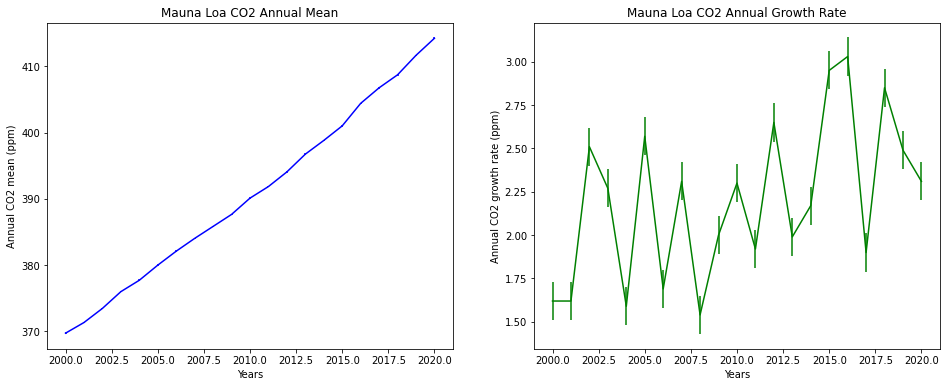

In [42]:
co2Mean = pd.read_csv("co2_annmean_mlo.csv", skiprows = range(97), skipfooter= 20, engine = 'python',
                        names = ["Year", "Mean", "Uncertainty", "Growth"])
df_co2 = pd.DataFrame(co2Mean)
df_co2 = df_co2.set_index("Year")
fig, axes = plt.subplots(figsize = (16,6), ncols=2) # To show two figures side by side

df_co2.Mean.plot(ax = axes[0], color = 'blue', yerr = df_co2.Uncertainty, xlabel = 'Years', ylabel ='Annual CO2 mean (ppm)',
                title = 'Mauna Loa CO2 Annual Mean')

co2GrowthRate = pd.read_csv("co2_gr_mlo.csv", skiprows = range(100), skipfooter = 1, engine = 'python',
                            names = ["Year", "Growth_rate", "Uncertainty"])
df_gr = pd.DataFrame(co2GrowthRate)
df_gr = df_gr.set_index("Year")
df_gr.Growth_rate.plot(ax= axes[1], color = 'green', yerr = df_gr.Uncertainty, xlabel = 'Years', ylabel ='Annual CO2 growth rate (ppm)',
                title = 'Mauna Loa CO2 Annual Growth Rate')
# plt.tight_layout()
plt.show()


### Projection of the annual mean of CO2 from 2022-2040 based on available data from 2000-2021
Assuming that a year's growth rate is the average of the previous three years' growth rates
A year's growth rate is calculated by taking the difference between the mean CO2 of two consecutive years and dividing it by the CO2 of the former year.

I opened the .csv file in Excel and do the math there.

In [113]:
# Read the file again with updated projection data and make a new plot of CO2 from 2000 to 2040
co2Mean = pd.read_csv("co2_annmean_mlo.csv", skiprows = range(97),
                        names = ["Year", "Mean", "Uncertainty", "Growth"])
# print(co2Mean)

df_co2 = pd.DataFrame(co2Mean)
df_co2 = df_co2.set_index("Year")
print(df_co2)
# plt.plot(df_co2["Year"], df_co2["Mean"]) # This plot only works if I don't set the column Year as index 
#                                            (try commenting the set_index line out to see the plot)

    # Extract the CO2 data of year 2040 from the data frame
print(f"Based on this projection model, the forecasted CO2 concentration in our atmosphere in 2040 is ", end = "")
print(df_co2.iloc[-1]["Mean"])   # Work, though using index -1 is not as good as being able to use the year 2040
#                                    to search for the value

# print(df_co2.loc["2040"]["Mean"]) # Not working

# Okay so maybe data frame read from .csv file is a little different with the data frames created from scratch in the example. 
# There's some problem with the index column/row label...


            Mean  Uncertainty    Growth
Year                                   
2000  369.710000         0.12       NaN
2001  371.320000         0.12  0.004355
2002  373.450000         0.12  0.005736
2003  375.980000         0.12  0.006775
2004  377.700000         0.12  0.004575
2005  379.980000         0.12  0.006037
2006  382.090000         0.12  0.005553
2007  384.020000         0.12  0.005051
2008  385.830000         0.12  0.004713
2009  387.640000         0.12  0.004691
2010  390.100000         0.12  0.006346
2011  391.850000         0.12  0.004486
2012  394.060000         0.12  0.005640
2013  396.740000         0.12  0.006801
2014  398.810000         0.12  0.005218
2015  401.010000         0.12  0.005516
2016  404.410000         0.12  0.008479
2017  406.760000         0.12  0.005811
2018  408.720000         0.12  0.004819
2019  411.660000         0.12  0.007193
2020  414.240000         0.12  0.006267
2021  416.450000         0.12  0.005335
2022  419.059138          NaN  0.006265


In [109]:
# Example data frame created from scratch
import pandas as pd
technologies = {
     'Courses':["Spark","PySpark","Hadoop","Python","pandas"],
     'Fee' :[24000,25000,25000,24000,24000],
     'Duration':['30day','50days','55days', '40days','60days'],
     'Discount':[1000,2300,1000,1200,2500]
          }
# index_labels=['r1','r2','r3','r4','r5']


df = pd.DataFrame(technologies)
df = df.set_index("Courses")
print(df)
print(df.loc["Spark"]["Fee"])

           Fee Duration  Discount
Courses                          
Spark    24000    30day      1000
PySpark  25000   50days      2300
Hadoop   25000   55days      1000
Python   24000   40days      1200
pandas   24000   60days      2500
24000


### Project global temperature rise based on the forecasted CO2 rise
"The invaluable, predictive value of the Hansen approach has been proven in this review, with evidence from the past to the present. It has been shown to be superior to many other climate probability models, mainly due to the discovery that the correlated global temperature increase and long term sea level rise can now be accurately predicted with ease by anyone, using Equations (1) or (2), simply based on CO2 concentration amounts in parts per million, up to 500 or 600 ppm where a divergence begins in the correlation, with increasing nonlinearity as the thermal response begins to lag behind as it departs from the linear, proportional relationship." (Valone, T. 2021)

I use the equation found in the research paper "Linear Global Temperature Correlation to Carbon Dioxide Level, Sea Level, and Innovative Solutions to a Projected 6°C Warming by 2100." (Valone, T. 2021) to predict the global temperature change based on the changes of CO2 concentration.  
**𝛥𝐶=𝛥𝑇×20=𝛥𝑆**  
The linear relationship is predicted to be accurate up to around 500-600ppm of CO2 where a divergence begins.
This equation is derived from James Hansen graphs of CO2 and MIT's table of data points derived from Hansen graphs. 



## Citation
Valone, T. (2021) Linear Global Temperature Correlation to Carbon Dioxide Level, Sea Level, and Innovative Solutions to a Projected 6°C Warming by 2100. Journal of Geoscience and Environment Protection, 9, 84-135. doi: 10.4236/gep.2021.93007.